# Importing Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Common Utility Function

In [2]:
def analyze_dataset(df: pd.DataFrame):
    print("Overview of the dataset:")
    display(df.info())

    print("\nFirst few rows of the dataset:")
    display(df.head())

    print("\nMissing Value Counts and Percentages:")
    missing_value_counts = df.isna().sum()
    missing_value_percentage = (missing_value_counts / len(df)) * 100

    missing_data_df = pd.DataFrame({
        'col_name': missing_value_counts.index,
        'missing_value_counts': missing_value_counts.values,
        'missing_value_percentage': missing_value_percentage.round(2).values
    })

    display(missing_data_df)
    print("\nNumber of duplicate rows in the dataset:", df.duplicated().sum())

# Data Ingestion

## Media Exposure By Customer Data 

In [3]:
media_exposure = pd.read_csv('media-exposure-by-customer.csv')

### Data Understanding

In [4]:
analyze_dataset(media_exposure)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197486 entries, 0 to 2197485
Data columns (total 2 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CUSTOMER_NUMBER        float64
 1   RECEIVED_OR_SAW_MEDIA  object 
dtypes: float64(1), object(1)
memory usage: 33.5+ MB


None


First few rows of the dataset:


CUSTOMER_NUMBER RECEIVED_OR_SAW_MEDIA
0         704306.0          APP HOMEPAGE
1         676786.0          APP HOMEPAGE
2         293452.0          APP HOMEPAGE
3         455955.0          APP HOMEPAGE
4        1068652.0          APP HOMEPAGE


Missing Value Counts and Percentages:


col_name  missing_value_counts  missing_value_percentage
0        CUSTOMER_NUMBER                     8                       0.0
1  RECEIVED_OR_SAW_MEDIA                     0                       0.0


Number of duplicate rows in the dataset: 47571


### Data Cleaning

In [5]:
# Dropping the null values of customers
media_exposure.dropna(inplace=True)

# Changing the type of CUSTOMER_NUMBER feature as appropriate
# Convert CUSTOMER_NUMBER to string after ensuring it is an integer, for consistent data type handling
media_exposure['CUSTOMER_NUMBER'] = media_exposure['CUSTOMER_NUMBER'].astype(int).astype(str)

# Before dropping the duplicates creating a feature called frequency to calculate how many times it repeated 
frequency_counts = media_exposure.groupby(media_exposure.columns.tolist()).size().reset_index(name='FREQUENCY')

# Merge the frequency counts back to the original DataFrame
media_exposure = media_exposure.merge(frequency_counts, on=media_exposure.columns.tolist(), how='left')

# Dropping the duplicate rows to ensure each CUSTOMER_NUMBER is unique
media_exposure.drop_duplicates(inplace=True)

# Resetting the index after dropping duplicates to maintain a clean, sequential index
media_exposure.reset_index(drop=True, inplace=True)

## Transaction Data

In [6]:
transaction_data = pd.read_csv('transaction-data.csv')

### Data Understanding

In [7]:
analyze_dataset(transaction_data)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460895 entries, 0 to 1460894
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   CUSTOMER_NUMBER     1460895 non-null  int64  
 1   BRAND_SALES         57740 non-null    float64
 2   BRAND_UNITS         57740 non-null    float64
 3   BRAND_TRANSACTIONS  57740 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 44.6 MB


None


First few rows of the dataset:


CUSTOMER_NUMBER  BRAND_SALES  BRAND_UNITS  BRAND_TRANSACTIONS
0           208356         5.00          1.0                 1.0
1              208        16.50          1.0                 1.0
2              216        57.75          2.0                 2.0
3             1518        19.00          1.0                 1.0
4             1974        14.00          1.0                 1.0


Missing Value Counts and Percentages:


col_name  missing_value_counts  missing_value_percentage
0     CUSTOMER_NUMBER                     0                      0.00
1         BRAND_SALES               1403155                     96.05
2         BRAND_UNITS               1403155                     96.05
3  BRAND_TRANSACTIONS               1403155                     96.05


Number of duplicate rows in the dataset: 0


In [8]:
transaction_data.describe().round(2)

CUSTOMER_NUMBER  BRAND_SALES  BRAND_UNITS  BRAND_TRANSACTIONS
count       1460895.00     57740.00     57740.00            57740.00
mean         730805.62        24.46         1.70                1.56
std          421976.80        24.10         1.47                1.07
min               1.00      -259.00        -6.00                1.00
25%          365365.50        10.99         1.00                1.00
50%          730749.00        19.00         1.00                1.00
75%         1096235.50        30.00         2.00                2.00
max         1461885.00      1066.86       120.00               45.00

### Data Cleaning

In [9]:
# 1. Identifying rows with negative values in BRAND_SALES, BRAND_UNITS, or BRAND_TRANSACTIONS
transaction_data_error_negative = transaction_data[
    (transaction_data["BRAND_UNITS"] < 0) |
    (transaction_data["BRAND_SALES"] < 0) |
    (transaction_data["BRAND_TRANSACTIONS"] < 0)
]

print("Rows with negative values in BRAND_UNITS, BRAND_SALES, or BRAND_TRANSACTIONS:")
display(transaction_data_error_negative)

# Calculate and print the percentage of rows with negative values
percentage_error_negative = (transaction_data_error_negative.shape[0] / transaction_data.shape[0]) * 100
print(f"Number of rows with negative values: {transaction_data_error_negative.shape[0]}")
print(f"Percentage of rows with negative values: {percentage_error_negative:.4f}%\n")


# 2. Identifying rows where any of the key columns are zero but not all are zero
transaction_data_error_partial_zero = transaction_data[
    ((transaction_data["BRAND_UNITS"] == 0) |
     (transaction_data["BRAND_SALES"] == 0) |
     (transaction_data["BRAND_TRANSACTIONS"] == 0)) &
    ~((transaction_data["BRAND_UNITS"] == 0) &
      (transaction_data["BRAND_SALES"] == 0) &
      (transaction_data["BRAND_TRANSACTIONS"] == 0))
]

print("Rows with partial zero values (where some but not all key metrics are zero):")
display(transaction_data_error_partial_zero)

# Calculate and print the percentage of rows with partial zero values
percentage_error_partial_zero = (transaction_data_error_partial_zero.shape[0] / transaction_data.shape[0]) * 100
print(f"Number of rows with partial zero values: {transaction_data_error_partial_zero.shape[0]}")
print(f"Percentage of rows with partial zero values: {percentage_error_partial_zero:.4f}%\n")


# 3. Identifying rows where BRAND_UNITS < BRAND_TRANSACTIONS
transaction_data_error_units_vs_transactions = transaction_data[
    transaction_data['BRAND_UNITS'] < transaction_data['BRAND_TRANSACTIONS']
]

print("Rows where BRAND_UNITS is less than BRAND_TRANSACTIONS:")
display(transaction_data_error_units_vs_transactions)

# Calculate and print the percentage of rows where BRAND_UNITS < BRAND_TRANSACTIONS
percentage_error_units_vs_transactions = (transaction_data_error_units_vs_transactions.shape[0] / transaction_data.shape[0]) * 100
print(f"Number of rows where BRAND_UNITS < BRAND_TRANSACTIONS: {transaction_data_error_units_vs_transactions.shape[0]}")
print(f"Percentage of rows where BRAND_UNITS < BRAND_TRANSACTIONS: {percentage_error_units_vs_transactions:.4f}%")

Rows with negative values in BRAND_UNITS, BRAND_SALES, or BRAND_TRANSACTIONS:


CUSTOMER_NUMBER  BRAND_SALES  BRAND_UNITS  BRAND_TRANSACTIONS
2787                9817        -8.31         -1.0                 1.0
3007              185962       -22.00         -2.0                 6.0
5662               44385       -19.00          0.0                 4.0
6169              210322       -20.31          0.0                 3.0
7651              241122       -38.00         -1.0                 1.0
11867             629247        -9.60          0.0                 2.0
11992             418908        -1.90          0.0                 2.0
13217             576887       -14.99          0.0                 2.0
15137             356529       -15.00         -2.0                 1.0
17303             416071       -13.30          6.0                15.0
18588             686080        -8.00         -1.0                 1.0
20250             633267        -7.50          0.0                 2.0
20893             510654        -5.50          0.0                 2.0
22836             702512       -10.00         -1.0                 1.0
25423             838517       -28.00         -2.0                 2.0
28733            1089501       -36.90          1.0                 4.0
31388             888589       -72.00         -2.0                 2.0
32902            1052926       -12.50          0.0                 2.0
33005             755521       -14.70          0.0                 2.0
33557             969734        -1.90          0.0                 2.0
33693            1216368       -22.00         -1.0                 1.0
35046            1388425      -107.60          0.0                 4.0
36212            1446980        -1.90          1.0                 2.0
42161            1284363       -19.00          0.0                 4.0
42207            1363320       -57.30          1.0                11.0
42800            1281657       -12.50          0.0                 2.0
42814            1296132        -1.90          0.0                 2.0
44386            1304074       -87.69         -1.0                 7.0
48329            1366835        -0.90          0.0                 2.0
50171            1137345       -15.80          0.0                 4.0
50770            1294284        -5.51          0.0                 2.0
1077884          1388412      -259.00         -6.0                 3.0
1078653           598196       -24.99          0.0                 2.0
1145232          1358583       -12.50          0.0                 2.0
1146458           671408        -2.50          1.0                 3.0
1214041           419056       -22.00         -1.0                 1.0
1270741          1026860       -38.00         -1.0                 1.0
1345129          1373046       -12.49         -1.0                 1.0
1345791           878208       -38.00         -1.0                 1.0
1346797           408556       -24.00          0.0                 2.0

Number of rows with negative values: 40
Percentage of rows with negative values: 0.0027%

Rows with partial zero values (where some but not all key metrics are zero):


CUSTOMER_NUMBER  BRAND_SALES  BRAND_UNITS  BRAND_TRANSACTIONS
18                 15164          0.0          1.0                 1.0
28                 23513          0.0          2.0                 2.0
33                 34414          0.0          1.0                 1.0
37                 37630          0.0          1.0                 1.0
61                 57999          0.0          1.0                 1.0
...                  ...          ...          ...                 ...
1425206            66280          0.0          1.0                 1.0
1425278           107462          0.0          1.0                 1.0
1425306           252041          0.0          0.0                 2.0
1425488           142284          0.0          1.0                 1.0
1425536           239227          0.0          2.0                 1.0

[1924 rows x 4 columns]

Number of rows with partial zero values: 1924
Percentage of rows with partial zero values: 0.1317%

Rows where BRAND_UNITS is less than BRAND_TRANSACTIONS:


CUSTOMER_NUMBER  BRAND_SALES  BRAND_UNITS  BRAND_TRANSACTIONS
64                 60953          0.0          0.0                 2.0
125               122984          0.0          0.0                 2.0
132               131193         44.0          2.0                 3.0
193               184938          0.0          0.0                 2.0
215               193581         57.0          3.0                 5.0
...                  ...          ...          ...                 ...
1425306           252041          0.0          0.0                 2.0
1425330           244848         38.0          2.0                 3.0
1425387           100770         19.0          1.0                 2.0
1425477            30965          6.5          1.0                 3.0
1425530            91741         36.0          2.0                 4.0

[1582 rows x 4 columns]

Number of rows where BRAND_UNITS < BRAND_TRANSACTIONS: 1582
Percentage of rows where BRAND_UNITS < BRAND_TRANSACTIONS: 0.1083%


In [10]:
# 1. Imputing Zero for Negative Values
# Replace negative values in BRAND_SALES, BRAND_UNITS, and BRAND_TRANSACTIONS with zero
transaction_data.loc[transaction_data["BRAND_SALES"] < 0, "BRAND_SALES"] = 0
transaction_data.loc[transaction_data["BRAND_UNITS"] < 0, "BRAND_UNITS"] = 0
transaction_data.loc[transaction_data["BRAND_TRANSACTIONS"] < 0, "BRAND_TRANSACTIONS"] = 0


# 2. Imputing Zero for Partial Zero Values
# Logic to handle partial zero values
transaction_data.loc[
    (transaction_data["BRAND_UNITS"] == 0) & 
    ((transaction_data["BRAND_SALES"] != 0) | (transaction_data["BRAND_TRANSACTIONS"] != 0)), 
    ["BRAND_SALES", "BRAND_TRANSACTIONS"]
] = 0

transaction_data.loc[
    (transaction_data["BRAND_SALES"] == 0) & 
    ((transaction_data["BRAND_UNITS"] != 0) | (transaction_data["BRAND_TRANSACTIONS"] != 0)), 
    ["BRAND_UNITS", "BRAND_TRANSACTIONS"]
] = 0

transaction_data.loc[
    (transaction_data["BRAND_TRANSACTIONS"] == 0) & 
    ((transaction_data["BRAND_SALES"] != 0) | (transaction_data["BRAND_UNITS"] != 0)), 
    ["BRAND_SALES", "BRAND_UNITS"]
] = 0


# 3. Correcting Rows Where BRAND_UNITS < BRAND_TRANSACTIONS
# Adjust BRAND_TRANSACTIONS to ensure it is not greater than BRAND_UNITS
transaction_data.loc[transaction_data['BRAND_UNITS'] < transaction_data['BRAND_TRANSACTIONS'], 'BRAND_TRANSACTIONS'] = transaction_data['BRAND_UNITS']

In [11]:
# Changing the type of CUSTOMER_NUMBER feature as appropriate
# Convert CUSTOMER_NUMBER to string for consistent data type handling across different datasets.
transaction_data['CUSTOMER_NUMBER'] = transaction_data['CUSTOMER_NUMBER'].astype(str)

# Handling the null values of BRAND_SALES, BRAND_UNITS, and BRAND_TRANSACTIONS.
# Impute missing values with zero, assuming no purchase occurred for transactions with missing data.
transaction_data.fillna(0, inplace=True)

## Customer Demographics Data

In [12]:
customer_demographics = pd.read_csv('customer-demographics.csv')

### Data Understanding

In [13]:
analyze_dataset(customer_demographics)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452707 entries, 0 to 1452706
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   CUSTOMER_NUMBER  1452707 non-null  int64  
 1   GENDER           1452707 non-null  object 
 2   AGE              1447300 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.2+ MB


None


First few rows of the dataset:


CUSTOMER_NUMBER GENDER   AGE
0               13      F  48.0
1               32      F  60.0
2              102      F  61.0
3              145      F  67.0
4              158      F  59.0


Missing Value Counts and Percentages:


col_name  missing_value_counts  missing_value_percentage
0  CUSTOMER_NUMBER                     0                      0.00
1           GENDER                     0                      0.00
2              AGE                  5407                      0.37


Number of duplicate rows in the dataset: 0


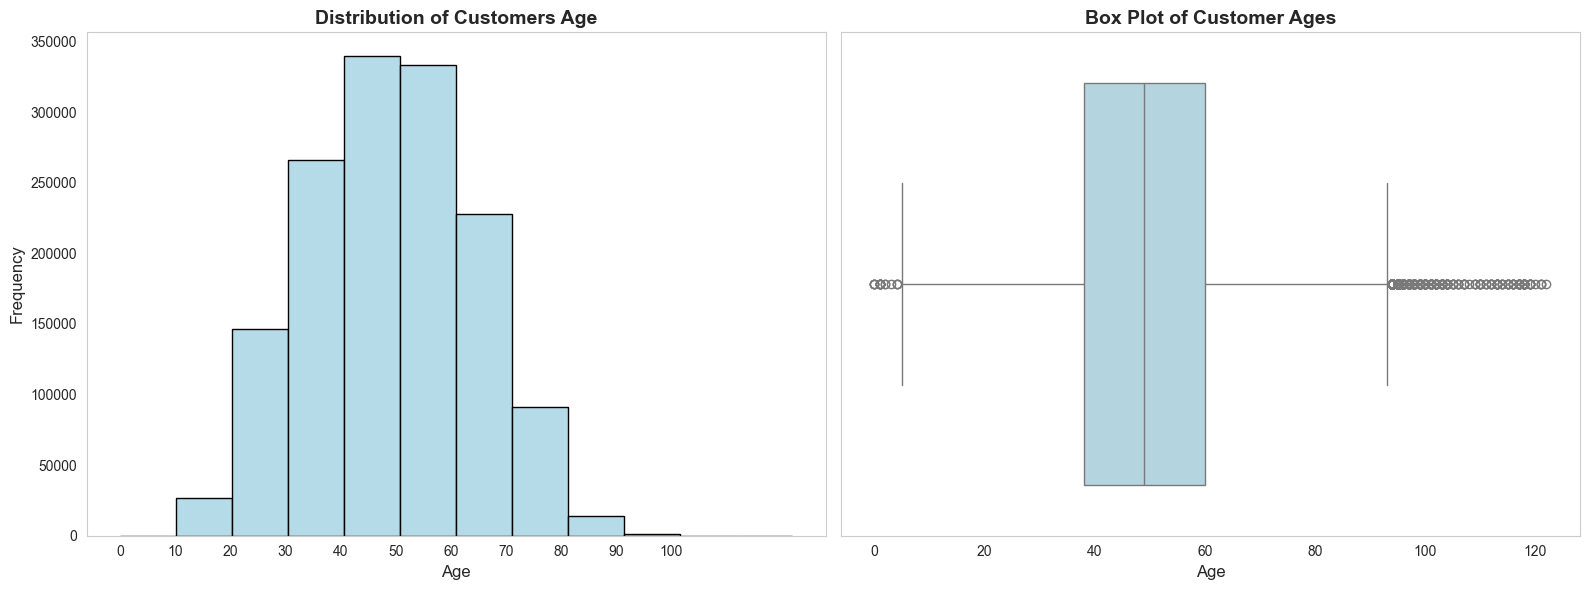

In [14]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Distribution of Customers Age
sns.histplot(customer_demographics['AGE'].dropna(), bins=12, kde=False, ax=axes[0], color="lightblue", edgecolor='black', alpha=0.9)
axes[0].set_title('Distribution of Customers Age', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_xticks(range(0, 101, 10)) 
axes[0].grid(False)

# Box Plot of Customer Ages
sns.boxplot(x=customer_demographics['AGE'].dropna(), ax=axes[1], color="lightblue")
axes[1].set_title('Box Plot of Customer Ages', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age', fontsize=12)
axes[1].grid(False)

plt.tight_layout()
plt.show()

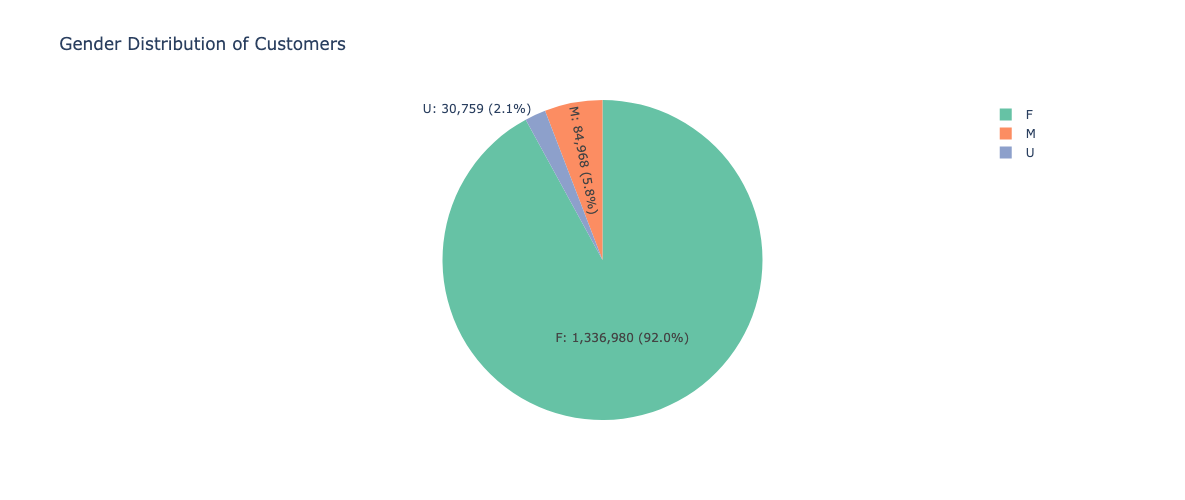

In [15]:
gender_counts = customer_demographics["GENDER"].value_counts()

fig = px.pie(
    names=gender_counts.index,
    values=gender_counts.values,
    title='Gender Distribution of Customers',
    labels={'names': 'Gender', 'values': 'Count'}
)

fig.update_traces(
    textinfo='label+percent',
    texttemplate='%{label}: %{value} (%{percent:.1%})',
    marker=dict(colors=['#66c2a5', '#fc8d62', '#8da0cb']) 
)

fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)

fig.show()

### Data Cleaning

In [18]:
def detect_outliers(data, column_name):

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Print Q1, Q3, IQR, and the bounds
    print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"Lower bound for outliers: {lower_bound}")
    print(f"Upper bound for outliers: {upper_bound}")

    # Identify outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Calculate the number of outliers and their proportion in the dataset
    num_outliers = outliers.shape[0]
    proportion_outliers = round(num_outliers / len(data), 3)

    # Print the number of outliers and their proportion
    print(f"Number of outliers in the {column_name} column: {num_outliers}")
    print(f"Proportion of outliers in the {column_name} column: {proportion_outliers}")

    return outliers

In [19]:
# Convert CUSTOMER_NUMBER to string for consistent data type handling
customer_demographics['CUSTOMER_NUMBER'] = customer_demographics['CUSTOMER_NUMBER'].astype(str)

# Calculate the mode of the GENDER column. The mode is the most frequently occurring value, which will be used to replace 'U'
gender_mode = customer_demographics['GENDER'].mode()[0]

# Replace 'U' in GENDER with the mode value and addresses the unknown gender values by assigning them to the most common gender
customer_demographics['GENDER'] = customer_demographics['GENDER'].replace('U', gender_mode)

# Calculate the median age for each gender
median_age_by_gender = customer_demographics.groupby('GENDER')['AGE'].median()

# Define a function to impute missing AGE values based on the median age for each gender
def impute_age(row):
    if pd.isnull(row['AGE']):
        return median_age_by_gender[row['GENDER']]
    else:
        return row['AGE']

# Apply the impute_age function to each row of the customer_demographics DataFrame. This fills in missing AGE values with the median age for the corresponding gender
customer_demographics['AGE'] = customer_demographics.apply(impute_age, axis=1)

# Detect outliers in the AGE column using the previously defined function. The function will identify and return outliers based on the IQR method
outliers= detect_outliers(customer_demographics, 'AGE')

Q1: 38.0, Q3: 59.0, IQR: 21.0
Lower bound for outliers: 6.5
Upper bound for outliers: 90.5
Number of outliers in the AGE column: 1500
Proportion of outliers in the AGE column: 0.001


In [20]:
# Removing outliers from the customer_demographics DataFrame since its proportion is very less
customer_demographics = customer_demographics[~customer_demographics.index.isin(outliers.index)]

# Data Integration

In [32]:
# Merging media exposure data with transaction data on CUSTOMER_NUMBER, keeping all records from both datasets
merged_data = pd.merge(media_exposure, transaction_data, on='CUSTOMER_NUMBER', how='outer')

# Merging the resulting dataset with customer demographics data on CUSTOMER_NUMBER, keeping all records from the merged dataset
customer_behavior_data = pd.merge(merged_data, customer_demographics, on='CUSTOMER_NUMBER', how='left')

### Data Understanding

In [33]:
analyze_dataset(customer_behavior_data)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149911 entries, 0 to 2149910
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CUSTOMER_NUMBER        object 
 1   RECEIVED_OR_SAW_MEDIA  object 
 2   FREQUENCY              int64  
 3   BRAND_SALES            float64
 4   BRAND_UNITS            float64
 5   BRAND_TRANSACTIONS     float64
 6   GENDER                 object 
 7   AGE                    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 147.6+ MB


None


First few rows of the dataset:


CUSTOMER_NUMBER RECEIVED_OR_SAW_MEDIA  FREQUENCY  BRAND_SALES  BRAND_UNITS  \
0          704306          APP HOMEPAGE          1          0.0          0.0   
1          704306            AISLE FINS          1          0.0          0.0   
2          704306              APP PUSH          1          0.0          0.0   
3          704306             APP INBOX          1          0.0          0.0   
4          676786          APP HOMEPAGE          1          0.0          0.0   

   BRAND_TRANSACTIONS GENDER   AGE  
0                 0.0      F  39.0  
1                 0.0      F  39.0  
2                 0.0      F  39.0  
3                 0.0      F  39.0  
4                 0.0      F  60.0


Missing Value Counts and Percentages:


col_name  missing_value_counts  missing_value_percentage
0        CUSTOMER_NUMBER                     0                      0.00
1  RECEIVED_OR_SAW_MEDIA                     0                      0.00
2              FREQUENCY                     0                      0.00
3            BRAND_SALES                     0                      0.00
4            BRAND_UNITS                     0                      0.00
5     BRAND_TRANSACTIONS                     0                      0.00
6                 GENDER                 10973                      0.51
7                    AGE                 10973                      0.51


Number of duplicate rows in the dataset: 0


In [34]:
# Filtering the dataset to include only rows where GENDER or AGE is null
customer_behavior_data[customer_behavior_data['GENDER'].isnull() | customer_behavior_data['AGE'].isnull()]

CUSTOMER_NUMBER RECEIVED_OR_SAW_MEDIA  FREQUENCY  BRAND_SALES  \
5879             593879          APP HOMEPAGE          1          0.0   
6443            1377847          APP HOMEPAGE          1          0.0   
6444            1377847             APP INBOX          1          0.0   
9164             394680          APP HOMEPAGE          1          0.0   
13997           1248925          APP HOMEPAGE          1          0.0   
...                 ...                   ...        ...          ...   
2139394         1104808              APP PUSH          1          0.0   
2139395         1104808             APP INBOX          1          0.0   
2144344         1223702             APP INBOX          1          0.0   
2145220         1163403             APP INBOX          1          0.0   
2146713          973067             APP INBOX          1          0.0   

         BRAND_UNITS  BRAND_TRANSACTIONS GENDER  AGE  
5879             0.0                 0.0    NaN  NaN  
6443             0.0                 0.0    NaN  NaN  
6444             0.0                 0.0    NaN  NaN  
9164             0.0                 0.0    NaN  NaN  
13997            0.0                 0.0    NaN  NaN  
...              ...                 ...    ...  ...  
2139394          0.0                 0.0    NaN  NaN  
2139395          0.0                 0.0    NaN  NaN  
2144344          0.0                 0.0    NaN  NaN  
2145220          0.0                 0.0    NaN  NaN  
2146713          0.0                 0.0    NaN  NaN  

[10973 rows x 8 columns]

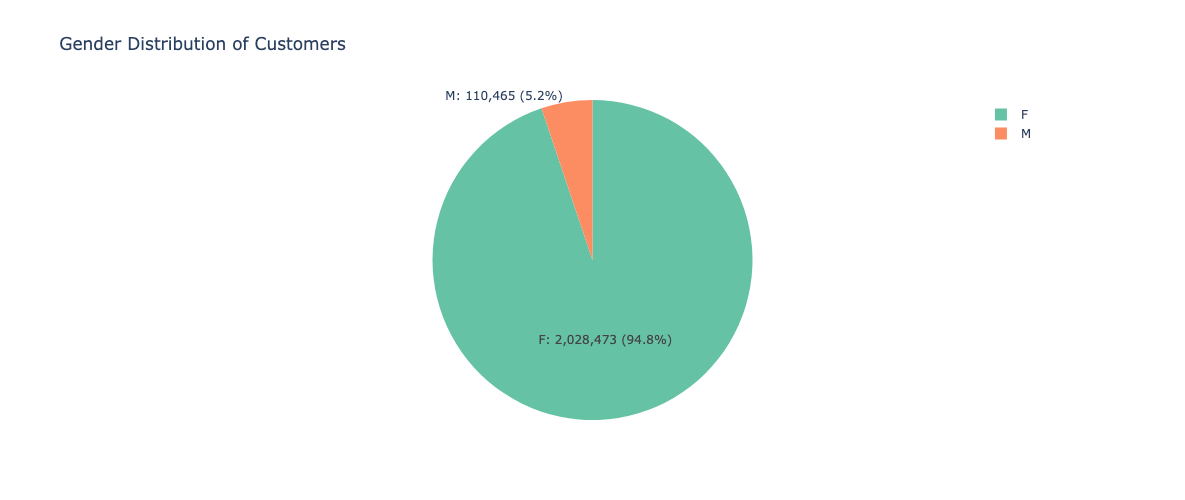

In [35]:
#pie chart of gender value counts
gender_counts = customer_behavior_data["GENDER"].value_counts()

fig = px.pie(
    names=gender_counts.index,
    values=gender_counts.values,
    title='Gender Distribution of Customers',
    labels={'names': 'Gender', 'values': 'Count'}
)

fig.update_traces(
    textinfo='label+percent',
    texttemplate='%{label}: %{value} (%{percent:.1%})',
    marker=dict(colors=['#66c2a5', '#fc8d62'])  
)

fig.update_layout(
    width=500,
    height=500,
    showlegend=True
)

fig.show()

## Data Cleaning

In [25]:
# Drop the null values since they are very less percenatge
customer_behavior_data = customer_behavior_data.dropna()
customer_behavior_data.reset_index(drop = True, inplace = True)

## Data Analysis

In [26]:
analyze_dataset(customer_behavior_data)

Overview of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138938 entries, 0 to 2138937
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   CUSTOMER_NUMBER        object 
 1   RECEIVED_OR_SAW_MEDIA  object 
 2   FREQUENCY              int64  
 3   BRAND_SALES            float64
 4   BRAND_UNITS            float64
 5   BRAND_TRANSACTIONS     float64
 6   GENDER                 object 
 7   AGE                    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 130.6+ MB


None


First few rows of the dataset:


CUSTOMER_NUMBER RECEIVED_OR_SAW_MEDIA  FREQUENCY  BRAND_SALES  BRAND_UNITS  \
0          704306          APP HOMEPAGE          1          0.0          0.0   
1          704306            AISLE FINS          1          0.0          0.0   
2          704306              APP PUSH          1          0.0          0.0   
3          704306             APP INBOX          1          0.0          0.0   
4          676786          APP HOMEPAGE          1          0.0          0.0   

   BRAND_TRANSACTIONS GENDER   AGE  
0                 0.0      F  39.0  
1                 0.0      F  39.0  
2                 0.0      F  39.0  
3                 0.0      F  39.0  
4                 0.0      F  60.0


Missing Value Counts and Percentages:


col_name  missing_value_counts  missing_value_percentage
0        CUSTOMER_NUMBER                     0                       0.0
1  RECEIVED_OR_SAW_MEDIA                     0                       0.0
2              FREQUENCY                     0                       0.0
3            BRAND_SALES                     0                       0.0
4            BRAND_UNITS                     0                       0.0
5     BRAND_TRANSACTIONS                     0                       0.0
6                 GENDER                     0                       0.0
7                    AGE                     0                       0.0


Number of duplicate rows in the dataset: 0


### 1.Are there any patterns between media exposure and purchase behaviour?

In [27]:
# Grouping the customer_behavior_data by 'RECEIVED_OR_SAW_MEDIA' and calculating sum and mean for 'BRAND_SALES', 'BRAND_UNITS', and 'BRAND_TRANSACTIONS'
media_purchase_data = customer_behavior_data.groupby('RECEIVED_OR_SAW_MEDIA').agg({
    'BRAND_SALES': ['sum', 'mean'],
    'BRAND_UNITS': ['sum', 'mean'],
    'BRAND_TRANSACTIONS': ['sum', 'mean']
}).reset_index()

# Renaming the columns of the resulting DataFrame for clarity
media_purchase_data.columns = ['Media Channel', 'Total Sales', 'Average Sales', 'Total Units', 'Average Units', 'Total Transactions', 'Average Transactions']

# Displaying the resulting DataFrame
display(media_purchase_data)

Media Channel  Total Sales  Average Sales  Total Units  Average Units  \
0      AISLE FINS    412666.73       1.177262      27280.0       0.077825   
1    APP HOMEPAGE    227806.26       0.686246      16040.0       0.048319   
2       APP INBOX    732324.11       0.920191      50264.0       0.063159   
3        APP PUSH    465517.98       0.967696      31994.0       0.066508   
4           EMAIL    359542.09       3.534347      24815.0       0.243935   
5  STORE TAKEOVER     45824.20       0.588833       3153.0       0.040516   

   Total Transactions  Average Transactions  
0             24920.0              0.071092  
1             14020.0              0.042234  
2             44270.0              0.055627  
3             28262.0              0.058750  
4             21915.0              0.215427  
5              2760.0              0.035466

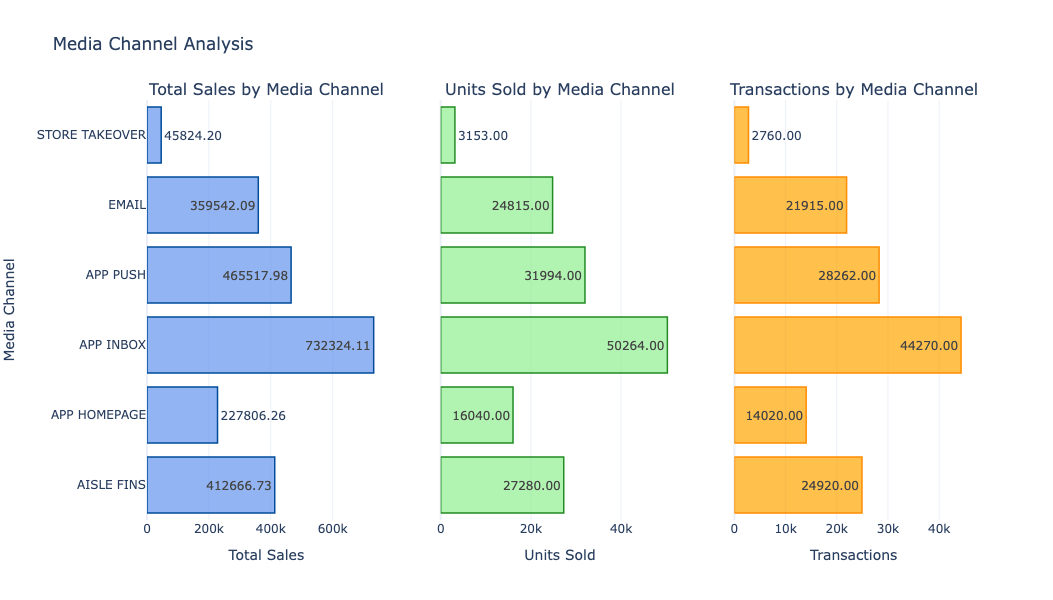

In [26]:
# Grouping the customer_behavior_data by 'RECEIVED_OR_SAW_MEDIA' and calculating the sum for 'BRAND_SALES', 'BRAND_TRANSACTIONS', and 'BRAND_UNITS'
data = customer_behavior_data.groupby('RECEIVED_OR_SAW_MEDIA').agg({
    'BRAND_SALES': 'sum',
    'BRAND_TRANSACTIONS': 'sum',
    'BRAND_UNITS': 'sum'
}).reset_index()

# Creating subplots with 1 row and 3 columns, each subplot has its own title
fig = make_subplots(rows=1, cols=3, subplot_titles=('Total Sales by Media Channel', 'Units Sold by Media Channel', 'Transactions by Media Channel'))

# Adding a horizontal bar plot for Total Sales
fig.add_trace(go.Bar(
    x=data['BRAND_SALES'],
    y=data['RECEIVED_OR_SAW_MEDIA'],
    orientation='h',  
    marker=dict(color='rgba(100, 149, 237, 0.7)', line=dict(color='rgb(0, 76, 153)', width=1.5)),
    text=data['BRAND_SALES'],
    texttemplate='%{text:.2f}',
    textposition='auto',
    name='Total Sales'
), row=1, col=1)

# Adding a horizontal bar plot for Units Sold
fig.add_trace(go.Bar(
    x=data['BRAND_UNITS'],
    y=data['RECEIVED_OR_SAW_MEDIA'],
    orientation='h', 
    marker=dict(color='rgba(144, 238, 144, 0.7)', line=dict(color='rgb(34, 139, 34)', width=1.5)),
    text=data['BRAND_UNITS'],
    texttemplate='%{text:.2f}',
    textposition='auto',
    name='Units Sold'
), row=1, col=2)

# Adding a horizontal bar plot for Transactions
fig.add_trace(go.Bar(
    x=data['BRAND_TRANSACTIONS'],
    y=data['RECEIVED_OR_SAW_MEDIA'],
    orientation='h',  
    marker=dict(color='rgba(255, 165, 0, 0.7)', line=dict(color='rgb(255, 140, 0)', width=1.5)),
    text=data['BRAND_TRANSACTIONS'],
    texttemplate='%{text:.2f}',
    textposition='auto',
    name='Transactions'
), row=1, col=3)

# Updating the layout of the figure
fig.update_layout(
    height=600, 
    width=1200, 
    title_text='Media Channel Analysis',
    showlegend=False,
    template='plotly_white'
)

# Setting the x-axis title for each subplot
fig.update_xaxes(title_text="Total Sales", row=1, col=1)
fig.update_xaxes(title_text="Units Sold", row=1, col=2)
fig.update_xaxes(title_text="Transactions", row=1, col=3)

# Setting the y-axis title for the first subplot and hiding y-axis labels for the second and third subplots
fig.update_yaxes(title_text="Media Channel", row=1, col=1)
fig.update_yaxes(showticklabels=False, row=1, col=2)  
fig.update_yaxes(showticklabels=False, row=1, col=3)

# Displaying the plot
fig.show()

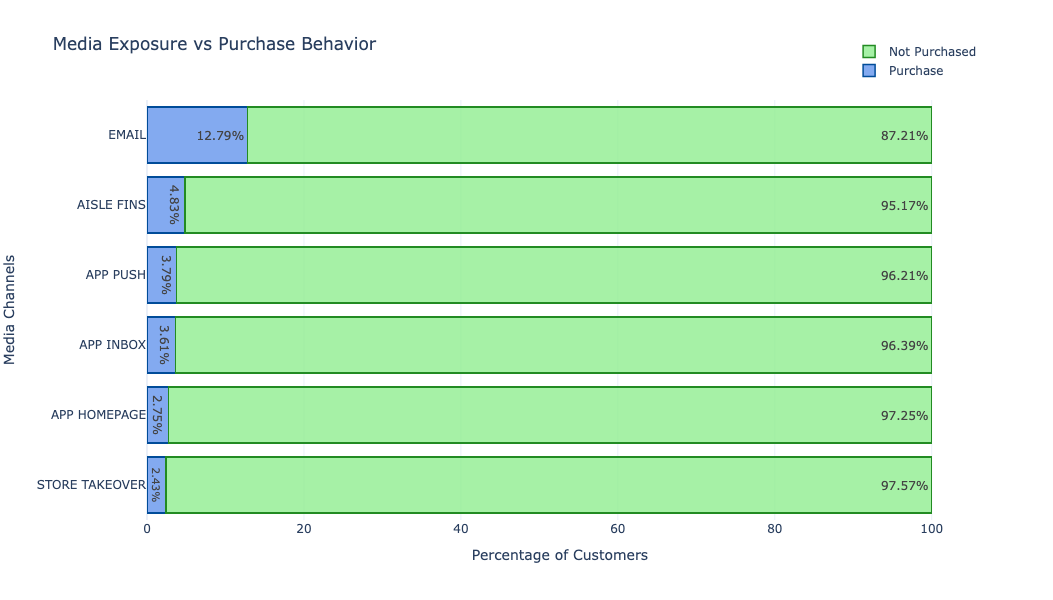

In [27]:
# Create a new column 'HAS_SALES' in customer_behavior_data, where 1 indicates sales and 0 indicates no sales
customer_behavior_data['HAS_SALES'] = customer_behavior_data['BRAND_SALES'].apply(lambda x: 1 if x > 0 else 0)

# Group by 'RECEIVED_OR_SAW_MEDIA' and aggregate the total number of customers and the number of conversions (HAS_SALES)
conversion_data = customer_behavior_data.groupby('RECEIVED_OR_SAW_MEDIA')['HAS_SALES'].agg(
    total_customers='size',
    conversions='sum'
).reset_index()

# Calculate the purchase rate and non-purchase rate
conversion_data['purchase_rate'] = round((conversion_data['conversions'] / conversion_data['total_customers']) * 100, 2)
conversion_data['non_purchase_rate'] = 100 - conversion_data['purchase_rate']

# Sort the data by purchase rate in ascending order
conversion_data = conversion_data.sort_values(by='purchase_rate', ascending=True)

# Prepare data for plotting
labels = conversion_data['RECEIVED_OR_SAW_MEDIA']
purchase_rate = conversion_data['purchase_rate']
non_purchase_rate = conversion_data['non_purchase_rate']

# Create a figure for the bar chart
fig = go.Figure()

# Add bars for Purchase Rate
fig.add_trace(go.Bar(
    y=labels,  
    x=purchase_rate, 
    name='Purchase',
    orientation='h', 
    marker=dict(color='rgba(100, 149, 237, 0.8)',  
                line=dict(color='rgb(0, 76, 153)', width=1.5)),  
    text=purchase_rate,
    texttemplate='%{text:.2f}%',
    textposition='auto'  
))

# Add bars for Non-Purchase Rate
fig.add_trace(go.Bar(
    y=labels,  
    x=non_purchase_rate,  
    name='Not Purchased',
    orientation='h',  
    marker=dict(color='rgba(144, 238, 144, 0.8)', 
                line=dict(color='rgb(34, 139, 34)', width=1.5)), 
    text=non_purchase_rate,
    texttemplate='%{text:.2f}%',
    textposition='auto'  
))

# Update layout for the stacked bar chart
fig.update_layout(
    barmode='stack',
    yaxis=dict(title='Media Channels'),
    xaxis=dict(title='Percentage of Customers'),
    title='Media Exposure vs Purchase Behavior',
    legend=dict(x=0.85, y=1.15, bgcolor='rgba(255, 255, 255, 0)'),
    height=600,
    width=900,
    template='plotly_white'
)

# Show the plot
fig.show()

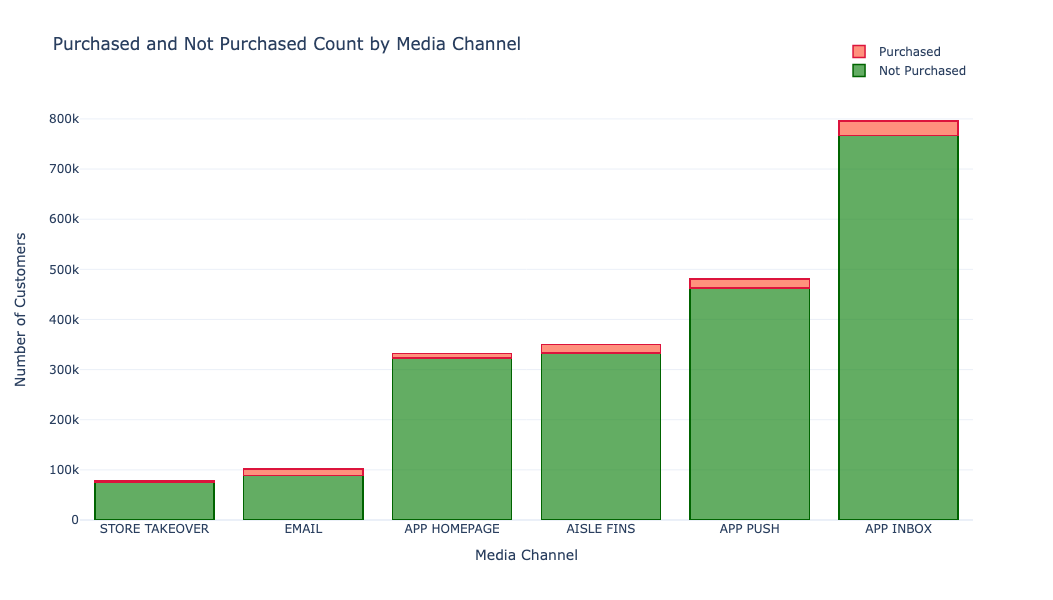

In [48]:
conversion_data['non_conversions'] = conversion_data['total_customers'] - conversion_data['conversions']

conversion_data = conversion_data.sort_values(by = "total_customers", ascending = True)

# Preparing data for plotting
labels = conversion_data['RECEIVED_OR_SAW_MEDIA']
conversions = conversion_data['conversions']
non_conversions = conversion_data['non_conversions']

# Create the stacked bar chart using Plotly
fig = go.Figure()

# Add the conversions bar
fig.add_trace(go.Bar(
    x=labels,
    y=non_conversions,
    name='Not Purchased',
    marker=dict(color='rgba(34, 139, 34, 0.7)', line=dict(color='rgb(0, 100, 0)', width=1.5)),
   
))

# Add the non-conversions bar
fig.add_trace(go.Bar(
    x=labels,
    y=conversions,
    name='Purchased',
    marker=dict(color='rgba(255, 99, 71, 0.7)', line=dict(color='rgb(220, 20, 60)', width=1.5)),
))

# Update layout for the stacked bar chart
fig.update_layout(
    barmode='stack',
    xaxis=dict(title='Media Channel'),
    yaxis=dict(title='Number of Customers'),
    title='Purchased and Not Purchased Count by Media Channel',
    legend=dict(x=0.85, y=1.15, bgcolor='rgba(255, 255, 255, 0)'),
    height=600,
    width=900,
    template='plotly_white'
)

### 2.Does customer gender and age have any impact on purchasing?

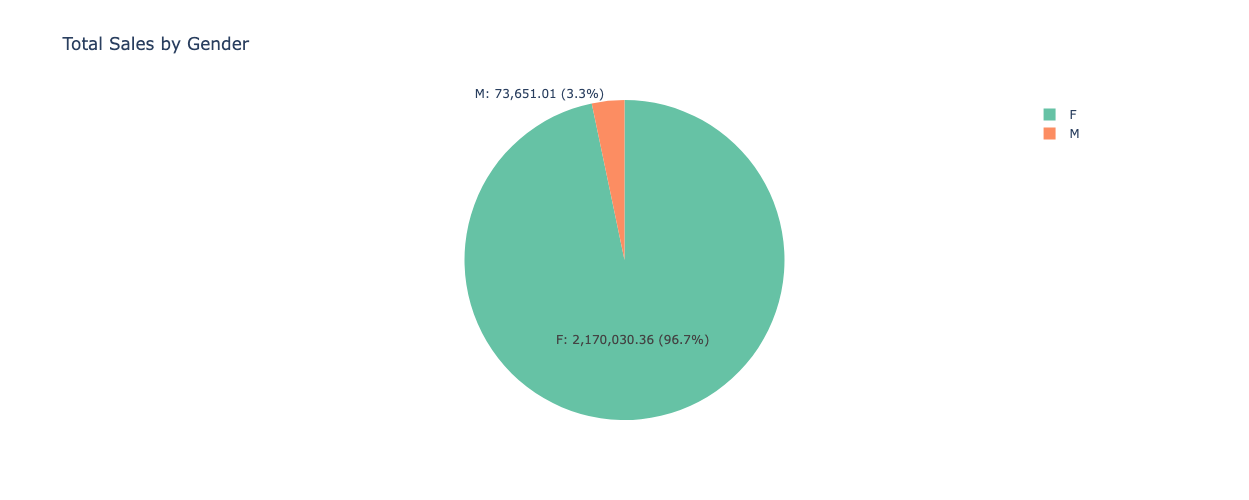

In [28]:
# Grouping the customer_behavior_data by 'GENDER' and calculating the sum of 'BRAND_SALES'
gender_analysis = customer_behavior_data.groupby('GENDER').agg({
    'BRAND_SALES': 'sum'
}).reset_index()

# Creating a pie chart using Plotly Express
fig = px.pie(
    gender_analysis,  
    names='GENDER', 
    values='BRAND_SALES',  
    title='Total Sales by Gender', 
    labels={'GENDER': 'Gender', 'BRAND_SALES': 'Total Sales'}  
)

# Updating the traces to include custom text information and colors
fig.update_traces(
    textinfo='label+percent', 
    texttemplate='%{label}: %{value} (%{percent:.1%})', 
    marker=dict(colors=['#66c2a5', '#fc8d62'])
)

# Updating the layout of the pie chart
fig.update_layout(
    width=500, 
    height=500, 
    showlegend=True 
)

# Displaying the pie chart
fig.show()

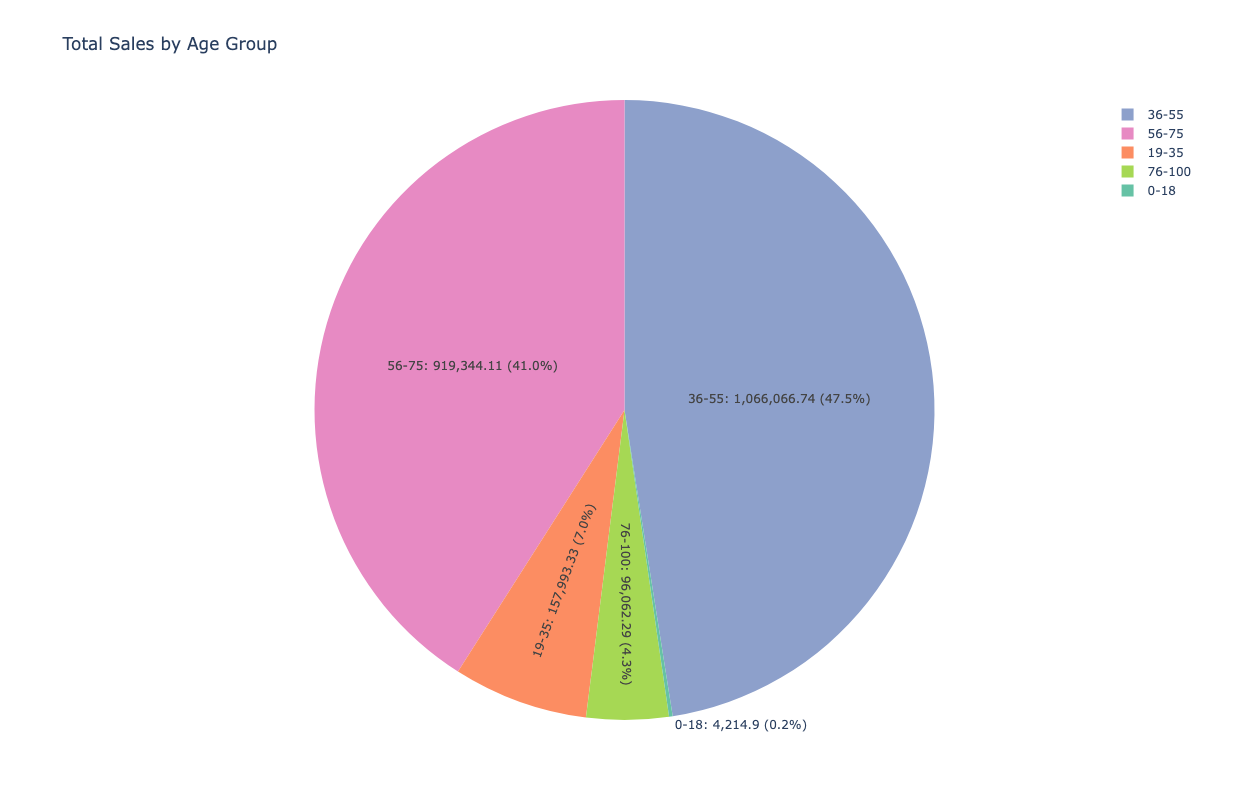

In [29]:
# Define age bins and labels
age_bins = [0, 19, 36, 56, 76, 100]
age_labels = ['0-18', '19-35', '36-55', '56-75', '76-100']

# Create age groups
customer_behavior_data['AGE_GROUP'] = pd.cut(customer_behavior_data['AGE'], bins=age_bins, labels=age_labels)

# Group by age group and calculate total sales
age_analysis = customer_behavior_data.groupby('AGE_GROUP').agg({
    'BRAND_SALES': 'sum'
}).reset_index()

# Create a pie chart for total sales by age group
fig_age = px.pie(
    age_analysis,
    names='AGE_GROUP',
    values='BRAND_SALES',
    title='Total Sales by Age Group',
    labels={'AGE_GROUP': 'Age Group', 'BRAND_SALES': 'Total Sales'}
)

# Update traces with custom text information and colors
fig_age.update_traces(
    textinfo='label+percent',
    texttemplate='%{label}: %{value} (%{percent:.1%})',
    marker=dict(colors=px.colors.qualitative.Set2)  
)

# Update layout to set plot size and show legend
fig_age.update_layout(
    width=800,
    height=800,
    showlegend=True
)

# Display the pie chart for age analysis
fig_age.show()

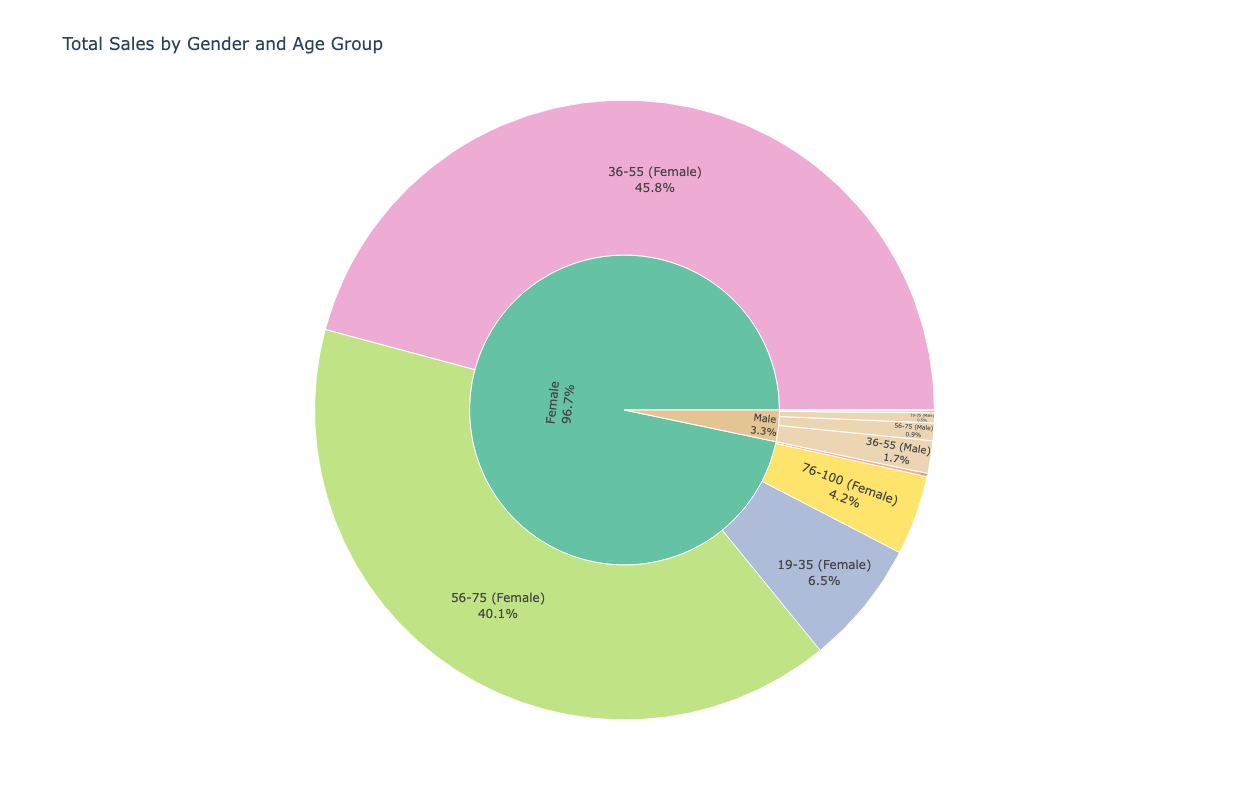

In [30]:
# Grouping data by gender and age group and calculating the sum of brand sales
nested_data = customer_behavior_data.groupby(['GENDER', 'AGE_GROUP']).agg({
    'BRAND_SALES': 'sum'
}).reset_index()

# Replacing gender abbreviations with full labels
nested_data['GENDER'] = nested_data['GENDER'].replace({'F': 'Female', 'M': 'Male'})

# Initializing lists for labels, parents, and values for the sunburst chart
labels = []
parents = []
values = []

# Populating the lists with gender and age group data
for gender in nested_data['GENDER'].unique():
    gender_data = nested_data[nested_data['GENDER'] == gender]
    total_sales_gender = gender_data['BRAND_SALES'].sum()
    
    # Adding gender data
    labels.append(gender)
    parents.append("")
    values.append(total_sales_gender)
    
    # Adding age group data under each gender
    for _, row in gender_data.iterrows():
        labels.append(f"{row['AGE_GROUP']} ({gender})")
        parents.append(gender)
        values.append(row['BRAND_SALES'])

# Custom colors for the sunburst chart
custom_colors = [
    '#636EFA', '#EF553B',  
    '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', 
    '#B6E880', '#FF97FF', '#FECB52', '#636EFA', '#EF553B', 
]

# Creating the sunburst chart
fig = go.Figure(go.Sunburst(
    labels=labels,
    parents=parents,
    values=values,
    branchvalues="total",  
    hoverinfo="label+value+percent entry+percent parent"  
))

# Updating the layout for the sunburst chart
fig.update_layout(
    title_text="Total Sales by Gender and Age Group",
    width=800,
    height=800,
)

# Updating traces with custom text information and colors
fig.update_traces(
    textinfo='label+percent entry',
    texttemplate='%{label}<br>%{percentRoot:.1%}', 
    marker=dict(colors=px.colors.qualitative.Set2, line=dict(width=1))  
)

# Displaying the sunburst chart
fig.show()

### 3.Are some media channels more effective in driving sales?

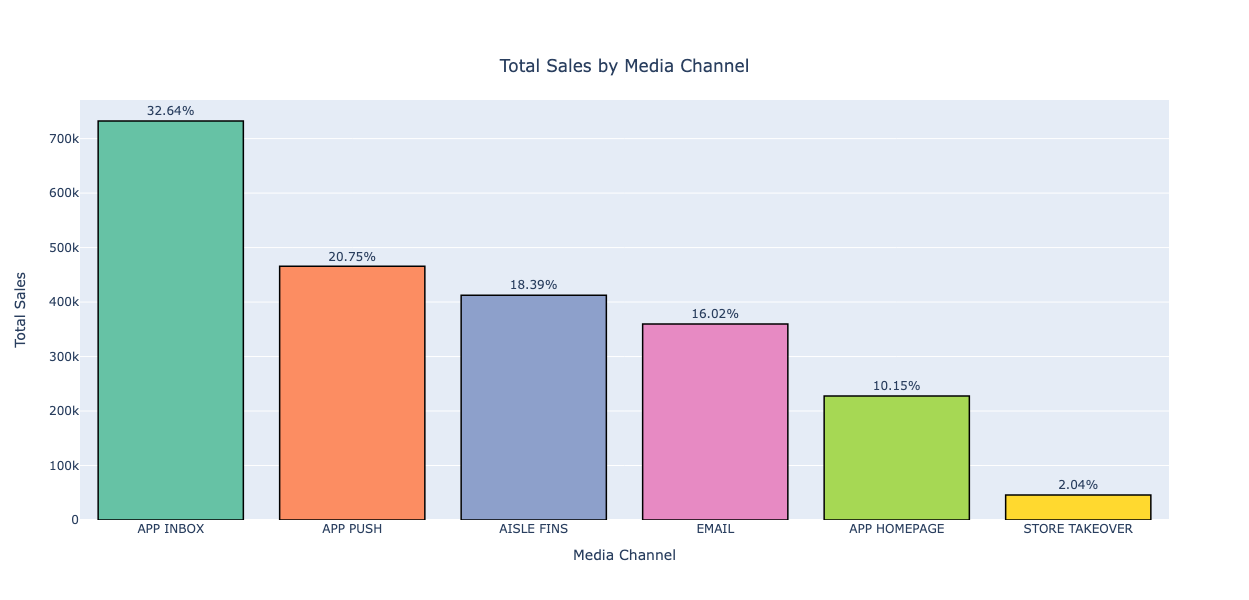

In [31]:
# Grouping the customer_behavior_data by 'RECEIVED_OR_SAW_MEDIA' and calculating the sum of 'BRAND_SALES'
channel_analysis = customer_behavior_data.groupby('RECEIVED_OR_SAW_MEDIA').agg({
    'BRAND_SALES': 'sum',
}).reset_index()

# Calculating the sales percentage for each media channel
channel_analysis['SALES_PCT'] = channel_analysis['BRAND_SALES'] / channel_analysis['BRAND_SALES'].sum() * 100

# Sorting the data by 'BRAND_SALES' in descending order
channel_analysis = channel_analysis.sort_values(by='BRAND_SALES', ascending=False)

# Creating a bar chart using Plotly Express
fig = px.bar(
    channel_analysis, 
    x='RECEIVED_OR_SAW_MEDIA', 
    y='BRAND_SALES',
    text='SALES_PCT',  
    title='Total Sales by Media Channel', 
    labels={'RECEIVED_OR_SAW_MEDIA': 'Media Channel', 'BRAND_SALES': 'Total Sales'}, 
    color='RECEIVED_OR_SAW_MEDIA', 
    color_discrete_sequence=px.colors.qualitative.Set2  
)

# Updating the traces to include custom text information and colors
fig.update_traces(
    texttemplate='%{text:.2f}%', 
    textposition='outside', 
    marker_line_color='black',  
    marker_line_width=1.5 
)

# Updating the layout of the bar chart
fig.update_layout(
    width=800,  
    height=600,  
    showlegend=False, 
    title={ 
        'text': 'Total Sales by Media Channel',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)

# Displaying the bar chart
fig.show()